In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from multilabel_cancer_classification import tokenizeCancerLabels
import seaborn as sns
import numpy as np
from labels import to_list, flat_map, classifications_list_to_cancer_paper_subs

In [3]:
df = pd.read_csv('../data/master/features/features.csv')
df['classifications_list'] = df.apply(lambda row: to_list(row, 'classifications'), axis=1)

# split of cancer types, paper types and all sub cats

In [4]:
df['cancer_paper_subs'] = df['classifications_list'].apply(classifications_list_to_cancer_paper_subs)
all_classifs = flat_map(df, 'cancer_paper_subs')

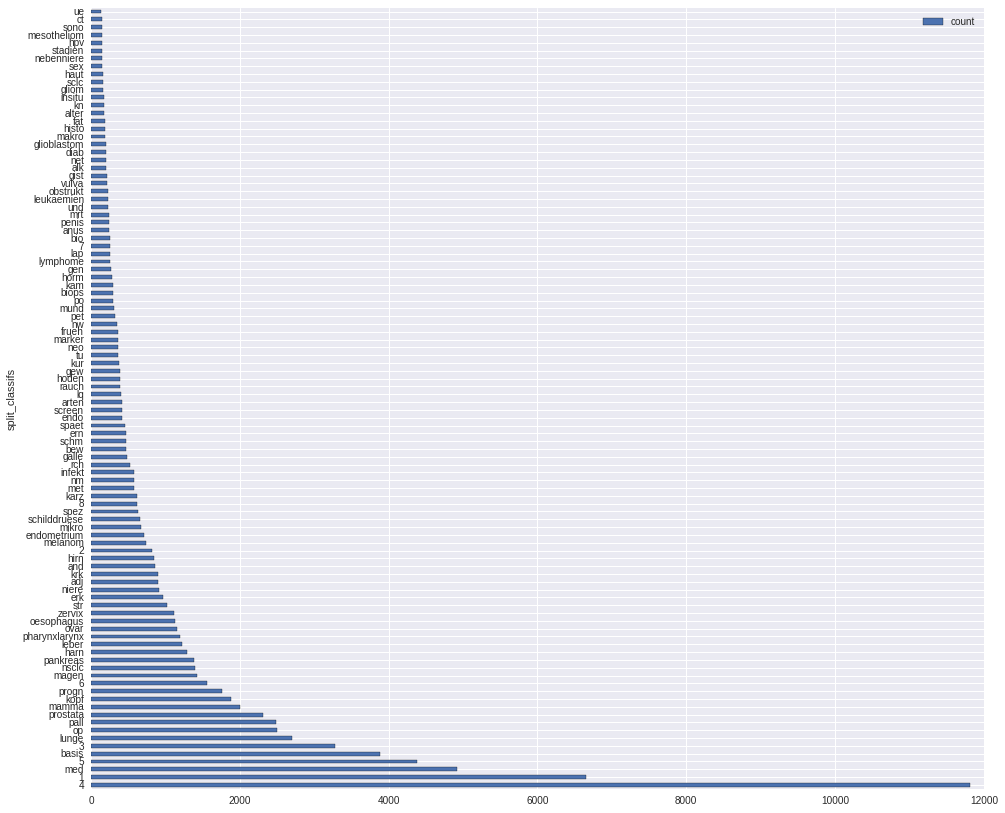

In [5]:
from collections import Counter
c = Counter(all_classifs)
# 100 top classifications cover ~92%
most_common_cancer_types = pd.DataFrame(c.most_common()[0:100])
most_common_cancer_types.columns = ['split_classifs', 'count']
most_common_cancer_types.set_index('split_classifs').plot.barh(figsize=(16,14))

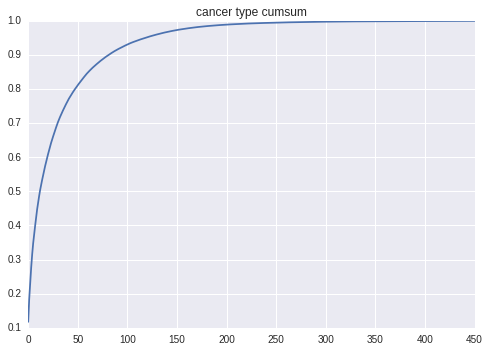

In [6]:
all_classifs = np.array(all_classifs)
counts = pd.DataFrame({'all_classifs': all_classifs}).groupby('all_classifs')['all_classifs'].count().sort_values(ascending=False).values
plt.plot(1.0*np.cumsum(counts)/np.sum(counts))
plt.title('cancer type cumsum')

# binarize labels

In [39]:
lv = MultiLabelBinarizer()
y = lv.fit_transform(df['cancer_paper_subs'])

print y.shape
labelCounts = y.sum(axis=0)

(45885, 451)


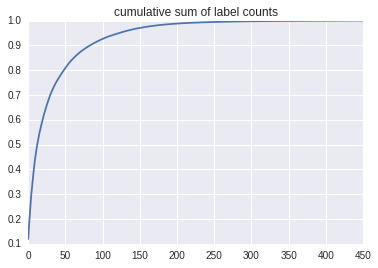

In [43]:
plt.plot(1.0*np.cumsum(sorted(labelCounts, reverse=True))/labelCounts.sum())
plt.title('cumulative sum of label counts')

# classifications by count

In [6]:
pd.DataFrame(
    {
        'classification': flat_map(df, 'classifications_list')
    }
).groupby('classification')['classification'].count().sort_values(ascending=False).head(25)

classification
lunge,nsclc,4-med-pall    505
magen,4-op                202
niere,4-med-pall          182
basis,5-schm-med          161
pankreas,4-med-pall       160
magen,4-med-pall          150
lunge,nsclc,4-progn       147
basis,6-kam-bio           137
ovar,4-med-pall           134
prostata,4-med            133
prostata,4-progn          132
pankreas,4-op             125
leber,4-progn             124
prostata,3-biops          118
basis,5-schm              118
basis,6-po                118
basis,6-bew               116
mamma,4-progn             116
basis,5-fat               112
lunge,1-karz              112
melanom,4-med-pall        109
basis,5-met-kn            108
basis,5-schm-nmed         105
mamma,4-med-adj           104
basis,5-ue                104
Name: classification, dtype: int64

# cancer types by count

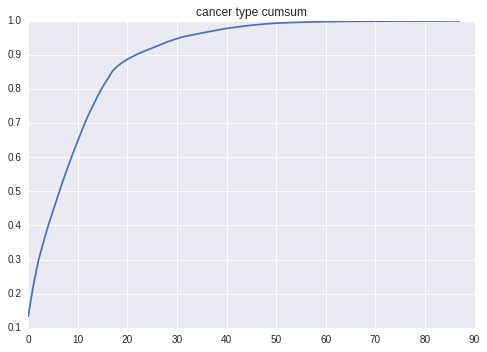

In [7]:
df['cancer_types_list'] = df.apply(lambda row: to_list(row, 'cancer_types'), axis=1)
cancer_types = np.array(flat_map(df, 'cancer_types_list'))
counts = pd.DataFrame({'cancer_type': cancer_types}).groupby('cancer_type')['cancer_type'].count().sort_values(ascending=False).values
plt.plot(1.0*np.cumsum(counts)/np.sum(counts))
plt.title('cancer type cumsum')

[('basis', 3384), ('prostata', 2213), ('mamma', 1833), ('lunge,nsclc', 1358), ('magen', 1281), ('pankreas', 1132), ('kopf,pharynxlarynx', 1127), ('lunge', 1104), ('oesophagus', 1023), ('leber', 1005), ('harn', 943), ('ovar', 940), ('zervix', 879), ('niere', 750), ('krk', 746), ('melanom', 688), ('schilddruese', 585), ('endometrium', 584), ('galle', 376), ('kopf,mund', 273), ('hirn', 233), ('hirn,glioblastom', 191), ('hoden', 184), ('lunge,sclc', 157), ('hirn,gliom', 156), ('kopf', 149), ('leukaemien-und-lymphome', 148), ('gist', 148), ('anus', 145), ('mesotheliom', 133)]


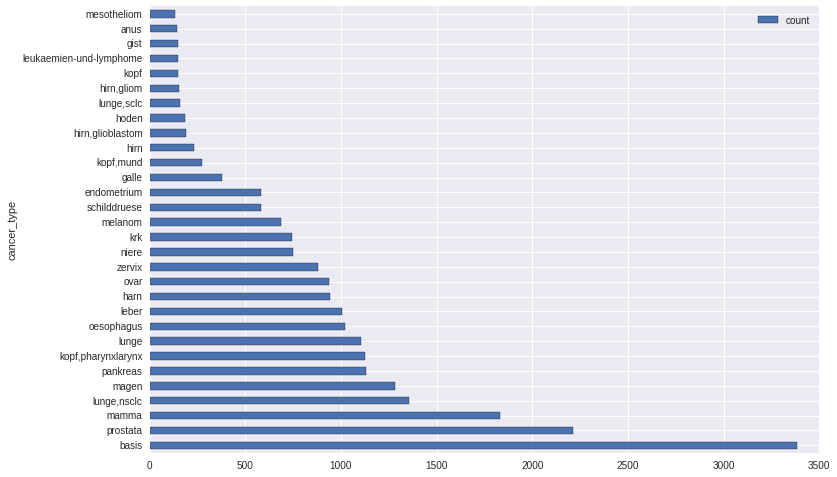

In [8]:
from collections import Counter
c = Counter(cancer_types)
print c.most_common()[0:30]
most_common_cancer_types = pd.DataFrame(c.most_common()[0:30])
most_common_cancer_types.columns = ['cancer_type', 'count']
most_common_cancer_types.set_index('cancer_type').plot.barh(figsize=(12,8))

# paper types

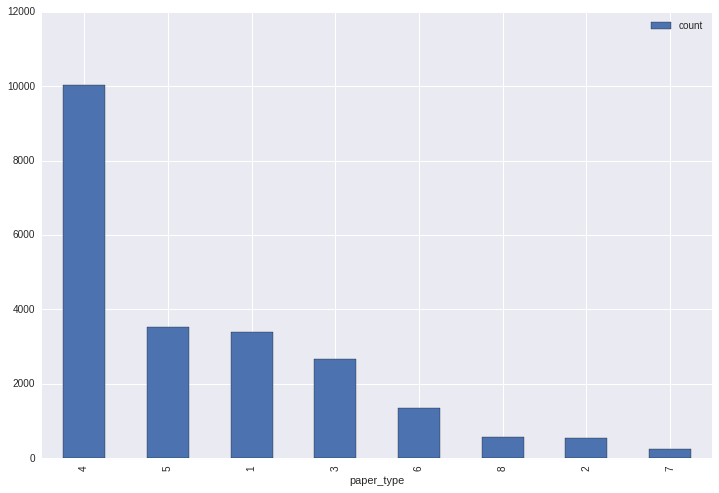

In [9]:
df['label_top_level_list'] = df.apply(lambda row: to_list(row, 'label_top_level'), axis=1)
paper_types = np.array(flat_map(df, 'label_top_level_list'))

c = Counter(paper_types)
most_common_paper_types = pd.DataFrame(c.most_common())
most_common_paper_types.columns = ['paper_type', 'count']
most_common_paper_types.set_index('paper_type').plot.bar(figsize=(12,8))

---